# <center>TABLICE ASOCJACYJNE</center>

1. Czym jest tablica asocjacyjna?
 - jest to abstrakcyjna struktura danych - "coś co pozwala na indeksowanie dowolnym typem danych"

2. Drzewo BST (binary-search tree)
 - to takie drzewo, że dla danego korzenia $x$ i jego dzieci $y,z$, zachodzi podstawowa zasada: $y \leqslant x \leqslant z$ (analogicznie dla kolejnych poddrzew). W przypadku realizacji tablicy asocjacyjnej nierówności są silne (nie ma powtórzeń).

Podstawowe operacje na drzewie BST:
 - search - znalezienie elementu
 - insert - wstawianie elementu
 - remove - usuwanie elementu
 - min/max
 - pred/succ - poprzednik/następnik - element o największej wartości mniejszej od węzła/element o najmniejszej wartości większej od węzłas

Przykład drzewa: </br></br>
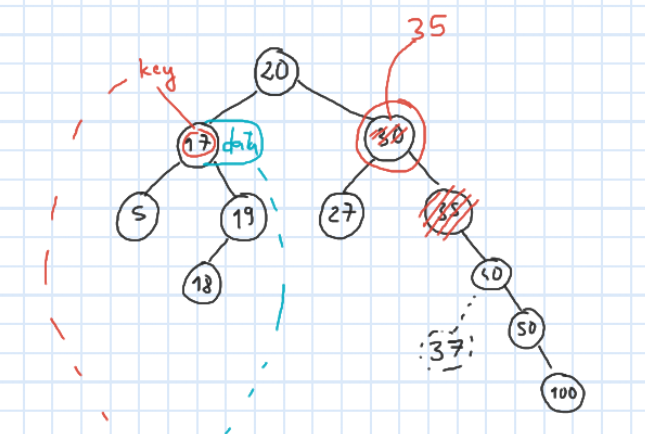

3. Podstawowe implementcje dla drzewa BST:

In [ ]:
class BSTnode:
    def __init__(self):
        self.left=self.right=None
        self.parent=None
        self.key=None
        self.data=None
        
def search(root,key):
    while root!=None:
        if root.key==key:
            return root
        elif key < root.key:
            root=root.left
        else:
            root=root.right
    return None

4. Wyszukiwanie min/max w drzewie BST:
    - dla danego węzła $x$, minimum znajduje się skrajnie po lewej, maksimum skrajnie po prawej

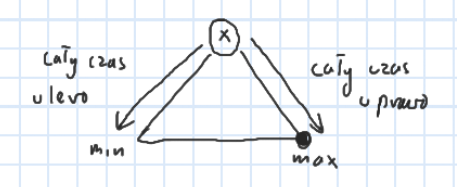

5. Obliczanie poprzednika i następnika w drzewie BST
    - niech $x$ - węzeł drzewa, który ma dwoje dzieci $x.left, x.right$
    - idea:
        - jeśli ma prawe dziecko, to bierzemy prawą część drzewa (z wartością węzła bezpośrednio większą od korzenia) i szukamy najmniejszej wartości, czyli przeszukujemy lewą część tego poddrzewa (szukamy minimum prawego poddrzewa) ($\textcolor{red}{\text{droga czerwona}}$) 
        - jeśli nie ma prawego dziecka, to wędrujemy w górę drzewa tak długo, aż jesteśmy prawym dzieckiem, kiedy nim przestajemy być to znaleźliśmy następnika ($\textcolor{blue}{\text{droga niebieska}}$)
        - analogicznie poprzednik ($\textcolor{green}{\text{droga zielona}}$)

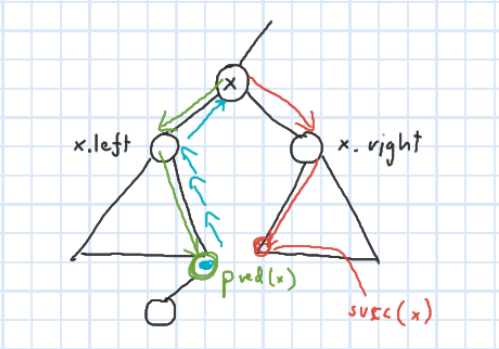



6. Złożoność operacji na BST: 
 - $O(h)$, gdzie $h$ to wysokość drzewa

Dla dobrze zrównoważonych drzew, jest to $O(logn)$ - czyli wysokość drzewa, lecz dla zdegenerowanych (też poprawnych), jest to $O(n)$

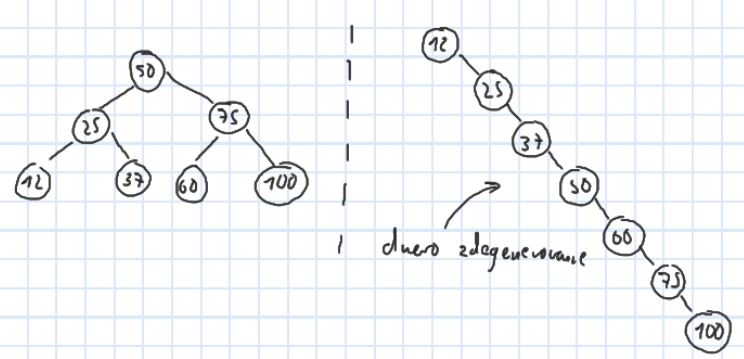

7. Drzewa czerwono-czarne.

Drzewa czerwono-czarne, to takie drzewa BST, w których stosuje się następujące reguły:
 - każdy węzeł jest albo $\textcolor{red}{\text{czerwony}}$ albo $\textcolor{black}{\text{czarny}}$
 - korzeń jest zawsze $\textcolor{black}{\text{czarny}}$
 - każdy liść jest $\textcolor{black}{\text{czarny}}$, dla $None$ też 
 - jeśli węzeł jest $\textcolor{red}{\text{czerwony}}$, to obaj jego synowie są $\textcolor{black}{\text{czarni}}$
 - każda prosta ścieżka z ustalonego węzła do liścia jest zawiera tyle samo $\textcolor{black}{\text{czarnych}}$ węzłów

Przykład drzewa czerwono-czarnego:

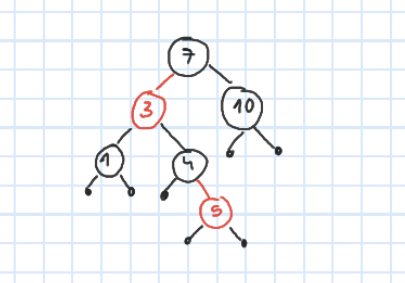

$H(x)$ - wysokość drzewa zakorzenionego w $x$.

$BH(x)$ - j.w., ale licząc tylko $\textcolor{black}{\text{czarne}}$ węzły. (tzw. $\textcolor{black}{\text{czarna}}$ wysokość)

$\Rightarrow H(x) \leqslant 2BH(x)$ 

Drzewo zakorzenione w $x$ ma co najmniej $2^{BH(x)}-1$ węzłów.

Stosowanie reguł drzewa czerwono-czarnego gwarantuje uniknięcie degeneracji drzewa.

8. Tablice haszujące.

Wstęp:
 - Podobnie jak w bucket sorcie, chcemy stworzyć sytuację, w której będziemy mogli określić pod jakim indeksem dany klucz powinien leżeć.

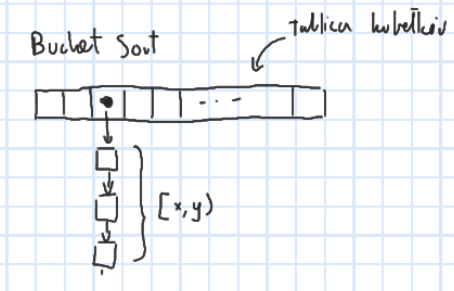

Idea:
 - Mamy tablicę $A$, zawierającą $n$ elementów. Tworzymy funkcję haszującą wyznaczającą indeks danego elementu.
    - $h: $ Klucze $\rightarrow \N$
 - element o kluczu $d$ umieszczamy pod indeksem $h(d)$ mod $n$
 - założenie: podobne klucze mają bardzo różne wartości funkcji haszującej (mieszającej)
 - chcemy, aby ta funkcja zachowywała się jak przysłowiowy $random$, ale deternistyczny

Problem:
 - Co jeśli dla pewnych $x,y: h(x.key) \equiv h(y.key)$ ?

Metody rozwiązywania konfliktów:
 - metoda listowa: tablica haszująca jest tablicą list i dwa elementy o tym samym haszu są przechowywane na jednej liście. </br></br>
 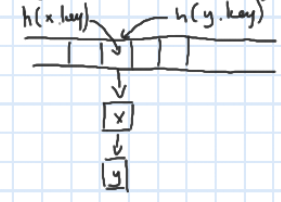
 - adresowanie otwarte:
      - wszystkie klucze są przechowywane bezpośrednio w tablicy
      - jeśli dane pole jest zajęte, to dla nowego klucza znajdujemy inne: np.
         - następne $h(x.key)+a\cdot t$, gdzie $t$, to liczba prób (mod $n$)
         - używamy dwóch funkcji haszujących: $h(x.key)+th_2(x.key)$
      - bardziej skomplikowane usuwanie elementów z tablicy, pole może mieć $3$ różne statusy: </br></br>
         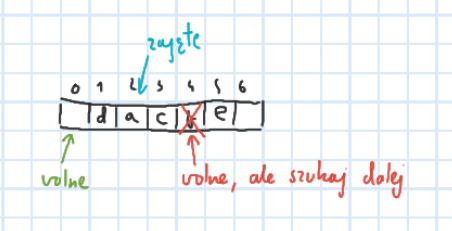

Jak stworzyć funkcję haszującą?
 - zamiana danych na liczbę </br></br>
   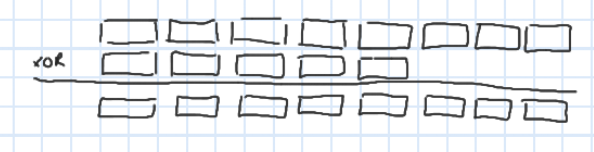
 - haszowanie uniwersalne:
   - $p$ - liczba pierwsza
   - $k \in \{0,..., p-1\}$
   - $h(k)=((a\cdot k+b) \text{ mod } p) \text{ mod } n$, gdzie $a,b$ są wybierane losowo ($a\neq0$)